## Unsupervised learning

#### 4 Marks ⟩ Do basic data pre-processing on the data and perform PCA (scratch implementation) and tell. What percentage of variance is covered by first principal component, first and second principal component.

In [1318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [1319]:
file_path = "archive/Airplane.csv"
data = pd.read_csv(file_path)
print(data)
print(len(data))

            Date   Time                                           Location   
0     09/17/1908  17:18                                Fort Myer, Virginia  \
1     07/12/1912  06:30                            AtlantiCity, New Jersey   
2     08/06/1913    NaN                 Victoria, British Columbia, Canada   
3     09/09/1913  18:30                                 Over the North Sea   
4     10/17/1913  10:30                         Near Johannisthal, Germany   
...          ...    ...                                                ...   
5263  05/20/2009  06:30                             Near Madiun, Indonesia   
5264  05/26/2009    NaN                  Near Isiro, DemocratiRepubliCongo   
5265  06/01/2009  00:15  AtlantiOcean, 570 miles northeast of Natal, Br...   
5266  06/07/2009  08:30       Near Port Hope Simpson, Newfoundland, Canada   
5267  06/08/2009    NaN                  State of Arunachal Pradesh, India   

                             Operator Flight #   
0            

In [1320]:
import pandas as pd
import numpy as np

numeric_data = data[['Aboard', 'Fatalities', 'Ground']]

import pandas as pd
column_data_types = data.dtypes

# Print the data types
print(column_data_types)


Date             object
Time             object
Location         object
Operator         object
Flight #         object
Route            object
Type             object
Registration     object
cn/In            object
Aboard          float64
Fatalities      float64
Ground          float64
Summary          object
dtype: object


In [1321]:
# Get all the column names
columns = data.columns
print(columns)


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')


In [1322]:
missing_values_X = data[columns].isnull().sum()
print("Missing values in each column:")
print(missing_values_X)


Missing values in each column:
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1707
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64


#### Since there are so many values of time which are missing in the rows, replacing it with the median values would be a fair distribution

### Dropping the rows that have missing values of location because, 1 cant be replace and they are too less

In [1323]:
missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " ,missing_values_ground)

data['Ground'].fillna(data['Ground'].mean(), inplace=True)

missing_values_ground = data['Ground'].isnull().sum()
print("Missing ground values " , missing_values_ground)

Missing ground values  22
Missing ground values  0


In [1324]:
missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing fatalities values " ,missing_values_fatalities)

data['Fatalities'].fillna(data['Fatalities'].mean(), inplace=True)

missing_values_fatalities = data['Fatalities'].isnull().sum()
print("Missing Fatalities values " , missing_values_fatalities)

Missing fatalities values  12
Missing Fatalities values  0


In [1325]:
missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " ,missing_values_Aboard)

data['Aboard'].fillna(data['Aboard'].mean(), inplace=True)

missing_values_Aboard = data['Aboard'].isnull().sum()
print("Missing Aboard values " , missing_values_Aboard)

Missing Aboard values  22
Missing Aboard values  0


In [1326]:
print(len(data))

5268


In [1327]:
print(len(data['Date'].unique()))
print(len(data['Time'].unique()))

# print(len(data['cn/In'].unique()))
# print(len(data['Route'].unique()))
print(len(data['Registration'].unique()))
# print(len(data['Type'].unique()))
# print(len(data['Route'].unique()))

# print(len(data['Operator'].unique()))
# print(len(data['Location'].unique()))

4753
1006
4906


In [1328]:
# Extract the "Location" column
Location_numbers = data["Location"]

# Create a dictionary to map unique Location numbers to numerical labels
ordinal_mapping = {Location: label+1 for label, Location in enumerate(Location_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Location"] = data["Location"].map(ordinal_mapping)

# Print the number of unique Location numbers
num_unique_Location_numbers = len(ordinal_mapping)
print("Number of Unique Location Numbers:", num_unique_Location_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Location"]])


Number of Unique Location Numbers: 4304
      Location
0            1
1            2
2            3
3            4
4            5
...        ...
5263      4300
5264      4301
5265      4302
5266      4303
5267      4304

[5268 rows x 1 columns]


In [1329]:
# Extract the "Operator" column
Operator_numbers = data["Operator"]

# Create a dictionary to map unique Operator numbers to numerical labels
ordinal_mapping = {Operator: label+1 for label, Operator in enumerate(Operator_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Operator"] = data["Operator"].map(ordinal_mapping)

# Print the number of unique Operator numbers
num_unique_Operator_numbers = len(ordinal_mapping)
print("Number of Unique Operator Numbers:", num_unique_Operator_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Operator"]])


Number of Unique Operator Numbers: 2477
      Operator
0            1
1            2
2            3
3            4
4            4
...        ...
5263      1419
5264      2336
5265       113
5266      2477
5267       202

[5268 rows x 1 columns]


In [1330]:
# Extract the "Route" column
Route_numbers = data["Route"]

# Create a dictionary to map unique Route numbers to numerical labels
ordinal_mapping = {Route: label+1 for label, Route in enumerate(Route_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Route"] = data["Route"].map(ordinal_mapping)

# Print the number of unique Route numbers
num_unique_Route_numbers = len(ordinal_mapping)
print("Number of Unique Route Numbers:", num_unique_Route_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Route"]])


Number of Unique Route Numbers: 3244
      Route
0         1
1         2
2         3
3         3
4         3
...     ...
5263   3240
5264   3241
5265   3242
5266   3243
5267   3244

[5268 rows x 1 columns]


In [1331]:
# Extract the "cn/In" column
cnIn_numbers = data["cn/In"]

# Create a dictionary to map unique cn/In numbers to numerical labels
ordinal_mapping = {cnIn: label+1 for label, cnIn in enumerate(cnIn_numbers.unique())}

# Apply the mapping to create a new numerical column
data["cn/In"] = data["cn/In"].map(ordinal_mapping)

# Print the number of unique cn/In numbers
num_unique_cnIn_numbers = len(ordinal_mapping)
print("Number of Unique cn/In Numbers:", num_unique_cnIn_numbers)

# Display the first few rows of the updated DataFrame
print(data[["cn/In"]])


Number of Unique cn/In Numbers: 3708
      cn/In
0         1
1         2
2         2
3         2
4         2
...     ...
5263    236
5264   3707
5265     20
5266   3708
5267      2

[5268 rows x 1 columns]


In [1332]:
# Extract the "Type" column
Type_numbers = data["Type"]

# Create a dictionary to map unique Type numbers to numerical labels
ordinal_mapping = {Type: label+1 for label, Type in enumerate(Type_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Type"] = data["Type"].map(ordinal_mapping)

# Print the number of unique Type numbers
num_unique_Type_numbers = len(ordinal_mapping)
print("Number of Unique Type Numbers:", num_unique_Type_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Type"]])


Number of Unique Type Numbers: 2447
      Type
0        1
1        2
2        3
3        4
4        5
...    ...
5263  1337
5264  1704
5265  2447
5266  1516
5267  1637

[5268 rows x 1 columns]


In [1333]:
# Extract the "Registration" column
Registration_numbers = data["Registration"]

# Create a dictionary to map unique Registration numbers to numerical labels
ordinal_mapping = {Registration: label+1 for label, Registration in enumerate(Registration_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Registration"] = data["Registration"].map(ordinal_mapping)

# Print the number of unique Registration numbers
num_unique_Registration_numbers = len(ordinal_mapping)
print("Number of Unique Registration Numbers:", num_unique_Registration_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Registration"]])


Number of Unique Registration Numbers: 4906
      Registration
0                1
1                1
2                1
3                1
4                1
...            ...
5263          4903
5264          4904
5265          4905
5266          4906
5267             1

[5268 rows x 1 columns]


In [1334]:
# Extract the "Flight #" column
flight_numbers = data["Flight #"]

# Create a dictionary to map unique flight numbers to numerical labels
ordinal_mapping = {flight: label+1 for label, flight in enumerate(flight_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Flight #"] = data["Flight #"].map(ordinal_mapping)

# Print the number of unique flight numbers
num_unique_flight_numbers = len(ordinal_mapping)
print("Number of Unique Flight Numbers:", num_unique_flight_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Flight #"]].head())


Number of Unique Flight Numbers: 725
   Flight #
0         1
1         1
2         2
3         1
4         1


In [1335]:
# Extract the "Time" column
Time_numbers = data["Time"]

# Create a dictionary to map unique Time numbers to numerical labels
ordinal_mapping = {Time: label+1 for label, Time in enumerate(Time_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Time"] = data["Time"].map(ordinal_mapping)

# Print the number of unique Time numbers
num_unique_Time_numbers = len(ordinal_mapping)
print("Number of Unique Time Numbers:", num_unique_Time_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Time"]])


Number of Unique Time Numbers: 1006
      Time
0        1
1        2
2        3
3        4
4        5
...    ...
5263     2
5264     3
5265   398
5266    19
5267     3

[5268 rows x 1 columns]


In [1336]:
# Extract the "Date" column
Date_numbers = data["Date"]

# Create a dictionary to map unique Date numbers to numerical labels
ordinal_mapping = {Date: label+1 for label, Date in enumerate(Date_numbers.unique())}

# Apply the mapping to create a new numerical column
data["Date"] = data["Date"].map(ordinal_mapping)

# Print the number of unique Date numbers
num_unique_Date_numbers = len(ordinal_mapping)
print("Number of Unique Date Numbers:", num_unique_Date_numbers)

# Display the first few rows of the updated DataFrame
print(data[["Date"]])


Number of Unique Date Numbers: 4753
      Date
0        1
1        2
2        3
3        4
4        5
...    ...
5263  4749
5264  4750
5265  4751
5266  4752
5267  4753

[5268 rows x 1 columns]


In [1337]:
print(data[["Flight #"]])

      Flight #
0            1
1            1
2            2
3            1
4            1
...        ...
5263         1
5264         1
5265       725
5266         1
5267         1

[5268 rows x 1 columns]


In [1338]:
missing_values_X = data[columns].isnull().sum()

# Check for missing values in 'y'

print("Missing values in each column:")
print(missing_values_X)

Missing values in each column:
Date              0
Time              0
Location          0
Operator          0
Flight #          0
Route             0
Type              0
Registration      0
cn/In             0
Aboard            0
Fatalities        0
Ground            0
Summary         390
dtype: int64


In [1339]:
numeric_data = data[['Aboard', 'Fatalities', 'Ground','Flight #', 'Date','Location','Operator','Route','Type', 'Registration','cn/In','Time' ]]

##### Step 2: Standardize the data



In [1340]:
mean = np.mean(numeric_data, axis=0)
std_dev = np.std(numeric_data, axis=0)
standardized_data = (numeric_data - mean) / std_dev
print(standardized_data)

        Aboard  Fatalities    Ground  Flight #      Date  Location  Operator   
0    -0.594532   -0.575057 -0.029865 -0.390563 -1.756982 -1.581025 -1.117402  \
1    -0.524736   -0.454426 -0.029865 -0.390563 -1.756246 -1.580224 -1.116014   
2    -0.617797   -0.575057 -0.029865 -0.384081 -1.755510 -1.579423 -1.114627   
3    -0.175758   -0.183006 -0.029865 -0.390563 -1.754773 -1.578621 -1.113240   
4     0.056895    0.299518 -0.029865 -0.390563 -1.754037 -1.577820 -1.113240   
...        ...         ...       ...       ...       ...       ...       ...   
5263  1.964645    2.350245  0.007261 -0.390563  1.738171  1.864356  0.849753   
5264 -0.548002   -0.484584  0.000000 -0.390563  1.738907  1.865158  2.121884   
5265  4.663413    6.270754 -0.029865  4.302354  1.739643  1.865959 -0.962027   
5266 -0.617797   -0.575057 -0.029865 -0.390563  1.740379  1.866761  2.317489   
5267 -0.338614   -0.213164 -0.029865 -0.390563  1.741115  1.867562 -0.838560   

         Route      Type  Registration 

##### Step 3: Calculate the covariance matrix



In [1341]:
cov_matrix = np.cov(standardized_data, rowvar=False)
print(cov_matrix)

[[ 1.00018986  0.75685718  0.02324085  0.42359718  0.14650381  0.090329
  -0.05148559  0.189652    0.17280809  0.13179747  0.17190667  0.15397561]
 [ 0.75685718  1.00018986  0.03517168  0.33070476  0.09793394  0.098129
  -0.03691186  0.13787922  0.11700369  0.0823577   0.12215965  0.13175055]
 [ 0.02324085  0.03517168  1.00018986  0.04954687  0.03094438 -0.01954775
  -0.01736147  0.03525084  0.03950197  0.02996379  0.03097513  0.04111243]
 [ 0.42359718  0.33070476  0.04954687  1.00018986  0.29125853  0.19802536
   0.19010719  0.3546739   0.30732424  0.30442509  0.32232159  0.30972153]
 [ 0.14650381  0.09793394  0.03094438  0.29125853  1.00018986  0.86258255
   0.81481007  0.71627885  0.88566171  0.9166442   0.78257726  0.3840792 ]
 [ 0.090329    0.098129   -0.01954775  0.19802536  0.86258255  1.00018986
   0.70121586  0.60525642  0.75789216  0.78330485  0.65915051  0.29896816]
 [-0.05148559 -0.03691186 -0.01736147  0.19010719  0.81481007  0.70121586
   1.00018986  0.6321623   0.7139352

##### Step 4: Compute the eigenvalues and eigenvectors of the covariance matrix


In [1342]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)
print(eigenvectors)

[5.85866642 1.9727859  1.00800475 0.85642771 0.63167369 0.04972653
 0.11722508 0.19693602 0.25354094 0.29086903 0.39452876 0.37189351]
[[ 0.09773579  0.62566506  0.1022696   0.18815947  0.11122858 -0.05627075
  -0.03834759  0.5329572   0.42914884 -0.24812952  0.05103427  0.06110888]
 [ 0.07881498  0.60849361  0.10405263  0.26253303  0.28224803  0.02778394
   0.05804268 -0.43918162 -0.32275307  0.39022417 -0.007282   -0.10290948]
 [ 0.0144544   0.05961824 -0.96672286  0.23779864  0.024477   -0.01464173
  -0.01060477  0.04892471 -0.01602068  0.02057814 -0.01651747 -0.0293754 ]
 [ 0.17335543  0.38359569 -0.07832074 -0.38228403 -0.77025439  0.0081187
   0.01523951 -0.01445777 -0.12239085  0.05050109 -0.22060464 -0.10262421]
 [ 0.39564145 -0.08988906  0.01817922  0.1250374   0.02383143  0.86545885
   0.19395288  0.01662398  0.06307767 -0.07760404 -0.14378621 -0.0355847 ]
 [ 0.35073284 -0.1121621   0.09040038  0.20397813  0.10102943 -0.21071154
  -0.18576099  0.35933103 -0.62624406 -0.253184

##### Step 5: Sort the eigenvalues in descending order


In [1343]:

eigenvalue_pairs = [(eigenvalues[i], eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigenvalue_pairs.sort(reverse=True, key=lambda x: x[0])
print(eigenvalue_pairs)

[(5.8586664169929215, array([0.09773579, 0.07881498, 0.0144544 , 0.17335543, 0.39564145,
       0.35073284, 0.33944197, 0.33368144, 0.36783507, 0.38585868,
       0.34842921, 0.20560295])), (1.9727858968741014, array([ 0.62566506,  0.60849361,  0.05961824,  0.38359569, -0.08988906,
       -0.1121621 , -0.20902754,  0.01775119, -0.04772919, -0.08467781,
       -0.02724918,  0.11278227])), (1.00800474723223, array([ 0.1022696 ,  0.10405263, -0.96672286, -0.07832074,  0.01817922,
        0.09040038,  0.04062584, -0.03731327, -0.00175182,  0.00352319,
        0.00525737, -0.16259821])), (0.856427713082441, array([ 0.18815947,  0.26253303,  0.23779864, -0.38228403,  0.1250374 ,
        0.20397813,  0.0410179 , -0.14021467,  0.08074389,  0.07653148,
        0.09927404, -0.76952396])), (0.631673687841578, array([ 0.11122858,  0.28224803,  0.024477  , -0.77025439,  0.02383143,
        0.10102943, -0.01179462, -0.01604067,  0.03976747, -0.02668   ,
       -0.1399829 ,  0.53010708])), (0.3945287

##### Step 6: Calculate the total variance and variance covered by each principal component


In [1344]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [eigenvalue / total_variance for eigenvalue, _ in eigenvalue_pairs]


In [1345]:
# Step 6: Calculate the total variance and variance covered by each principal component
total_variance = sum(eigenvalues)
variance_explained = [(eigenvalue / total_variance) * 100 for eigenvalue, _ in eigenvalue_pairs]
print(total_variance)
print(variance_explained)


12.002278336814118
[48.812952446060706, 16.436761767330896, 8.398445019729433, 7.135542844857662, 5.262948167966327, 3.287115583850745, 3.0985242612499855, 2.423448500031735, 2.1124401044137033, 1.640821985725992, 0.9766901936268316, 0.41430912515599444]


In [1346]:
# Step 7: Calculate the percentage of variance covered by the first and second principal components
percentage_variance_first_pc = variance_explained[0]
percentage_variance_second_pc = variance_explained[1]
print(percentage_variance_first_pc)
print(percentage_variance_second_pc)

48.812952446060706
16.436761767330896


In [1347]:
print("Percentage of Variance Explained by First Principal Component:", percentage_variance_first_pc)
print("Percentage of Variance Explained by Second Principal Component:", percentage_variance_second_pc )
print("Percentage of Variance Explained by Third Principal Component:",variance_explained[2] )
print("Percentage of Variance Explained by First and Second Principal Component:", percentage_variance_second_pc + percentage_variance_first_pc)
print("Percentage of Variance Explained by First and third Principal Component:", percentage_variance_first_pc +variance_explained[2]  )
print("Percentage of Variance Explained by Second and third Principal Component:", percentage_variance_second_pc +variance_explained[2]  )

Percentage of Variance Explained by First Principal Component: 48.812952446060706
Percentage of Variance Explained by Second Principal Component: 16.436761767330896
Percentage of Variance Explained by Third Principal Component: 8.398445019729433
Percentage of Variance Explained by First and Second Principal Component: 65.2497142133916
Percentage of Variance Explained by First and third Principal Component: 57.21139746579014
Percentage of Variance Explained by Second and third Principal Component: 24.83520678706033


---------------------------------------------------------------------------------------------------------------------------------------------

In [1348]:
import numpy as np

In [1349]:
total_variance = sum(eigenvalues)
explained_variance_ratio = [eigenvalue / total_variance for eigenvalue, _ in eigenvalue_pairs]
cumulative_explained_variance = np.cumsum(explained_variance_ratio)


In [1350]:
# Step 6: Project the data onto the selected principal components
projected_data = np.dot(standardized_data, eigenvectors.T)
print(len(projected_data))


5268


In [1351]:
# Find the index of the "Type" column in the original column names
column_names = ['Aboard', 'Fatalities', 'Ground', 'Flight #', 'Date', 'Location', 'Operator', 'Route', 'Type', 'Registration', 'cn/In', 'Time']

type_column_index = column_names.index('Type')
print(type_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, type_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


8
[ 1.20849677  1.22719764  1.19829325 ...  1.22076768 -3.17132636
 -0.0108522 ]


In [1352]:
print(projected_data[:, 8])

[ 1.20849677  1.22719764  1.19829325 ...  1.22076768 -3.17132636
 -0.0108522 ]


In [1353]:
print(data['Type'])

0          1
1          2
2          3
3          4
4          5
        ... 
5263    1337
5264    1704
5265    2447
5266    1516
5267    1637
Name: Type, Length: 5268, dtype: int64


------------------------------------------------------------------------------------------------------------------

In [1354]:
import numpy as np

def calculate_silhouette_score(data, cluster_assignments, centroids):
    n = len(data)
    silhouette_scores = np.zeros(n)
    
    for i in range(n):
        # Calculate a (average distance to other data points in the same cluster)
        cluster_i = cluster_assignments[i]
        cluster_data = data[cluster_assignments == cluster_i]
        a = np.mean(np.abs(data[i] - cluster_data))
        
        # Calculate b (smallest average distance to data points in other clusters)
        b = np.inf
        for k in range(len(centroids)):
            if k != cluster_i:
                other_cluster_data = data[cluster_assignments == k]
                distance_to_other_cluster = np.mean(np.abs(data[i] - other_cluster_data))
                b = min(b, distance_to_other_cluster)
        
        # Calculate silhouette score
        silhouette_scores[i] = (b - a) / max(a, b)
    
    # Compute the mean silhouette score
    mean_silhouette_score = np.mean(silhouette_scores)
    
    return mean_silhouette_score

# Calculate the silhouette score for your K-means clustering


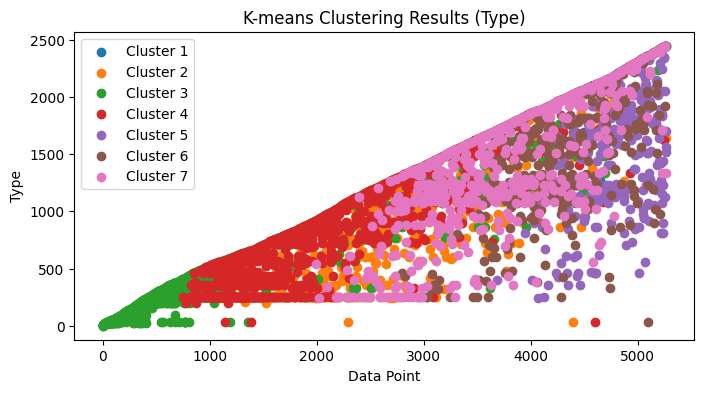

In [1355]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Location' and 'Operator' as columns in your DataFrame

# Extract the columns to be clustered
type_data = projected_data[:, 8]

K = 7

# Maximum number of iterations
max_iterations = 100

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(type_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(type_data))

#  Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(type_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = type_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_type'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_type'] == k]
    plt.scatter(cluster_data.index, cluster_data['Type'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('Type')
plt.title('K-means Clustering Results (Type)')
plt.legend()
plt.show()



In [1356]:

silhouette_score = calculate_silhouette_score(type_data, cluster_assignments, centroids)

print(silhouette_score)

0.5671644553506385


##### Highest Score for K = 6

[0 1 4 5 6]


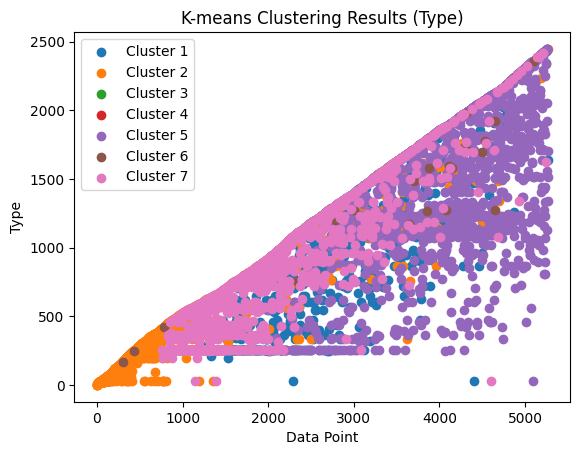

In [1357]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Location' and 'Operator' as columns in your DataFrame

# Extract the columns to be clustered
type_data = data['Cluster_type'].values  # Convert to NumPy array

K = len(data['Cluster_type'].unique())

# Maximum number of iterations
max_iterations = 100

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(type_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(type_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(type_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = type_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_typeee'] = cluster_assignments

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_typeee'] == k]
    plt.scatter(cluster_data.index, cluster_data['Type'], label=f'Cluster {k + 1}')

# Find unique cluster assignments using np.unique()
unique_cluster_assignments = np.unique(cluster_assignments)
print(unique_cluster_assignments)

plt.xlabel('Data Point')
plt.ylabel('Type')
plt.title('K-means Clustering Results (Type)')
plt.legend()
plt.show()


In [1358]:
import numpy as np

def calculate_silhouette_score(data, cluster_assignments, centroids):
    n = len(data)
    silhouette_scores = np.zeros(n)
    
    for i in range(n):
        # Calculate a (average distance to other data points in the same cluster)
        cluster_i = cluster_assignments[i]
        cluster_data = data[cluster_assignments == cluster_i]
        a = np.mean(np.abs(data[i] - cluster_data))
        
        # Calculate b (smallest average distance to data points in other clusters)
        b = np.inf
        for k in range(len(centroids)):
            if k != cluster_i:
                other_cluster_data = data[cluster_assignments == k]
                distance_to_other_cluster = np.mean(np.abs(data[i] - other_cluster_data))
                b = min(b, distance_to_other_cluster)
        
        # Calculate silhouette score
        silhouette_scores[i] = (b - a) / max(a, b)
    
    # Compute the mean silhouette score
    mean_silhouette_score = np.mean(silhouette_scores)
    
    return mean_silhouette_score

# Calculate the silhouette score for your K-means clustering
silhouette_score = calculate_silhouette_score(type_data, cluster_assignments, centroids)

print("Silhouette Score:", silhouette_score)


c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\Chief Engineer (C)\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Silhouette Score: 0.8439394393789847


In [1359]:

Location_column_index = column_names.index('Location')
print(Location_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, Location_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


5
[ 1.64621233  1.65527313  1.63587158 ...  0.95049434 -1.58165452
  0.80374764]


In [1360]:

Operator_column_index = column_names.index('Operator')
print(Operator_column_index)
# Use this index to access the corresponding column in projected_data
corresponding_column_in_pca = projected_data[:, Operator_column_index]

# Print the corresponding column
print(corresponding_column_in_pca)


6
[-1.30921605 -1.31159777 -1.31855474 ...  2.5158141   1.61906088
 -0.25922657]


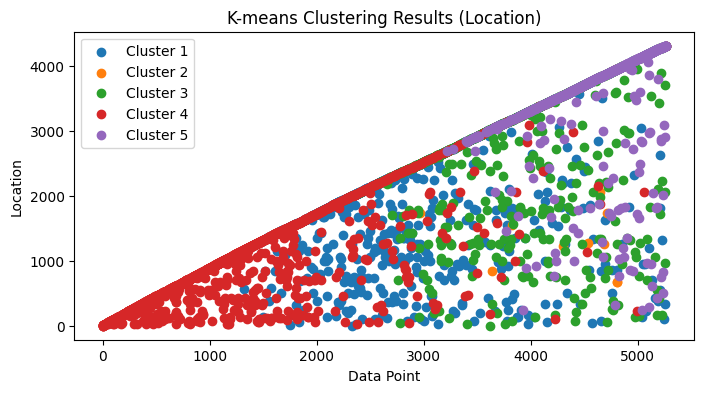

In [1361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Location' and 'Operator' as columns in your DataFrame

# Extract the columns to be clustered
# Operator
Location_data = projected_data[:, Location_column_index]

K = 5

# Maximum number of iterations
max_iterations = 100

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(Location_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Location_data))

#  Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(Location_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = Location_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_Location'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_Location'] == k]
    plt.scatter(cluster_data.index, cluster_data['Location'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('Location')
plt.title('K-means Clustering Results (Location)')
plt.legend()
plt.show()



In [1362]:

silhouette_score = calculate_silhouette_score(Location_data, cluster_assignments, centroids)

print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.568173146063625


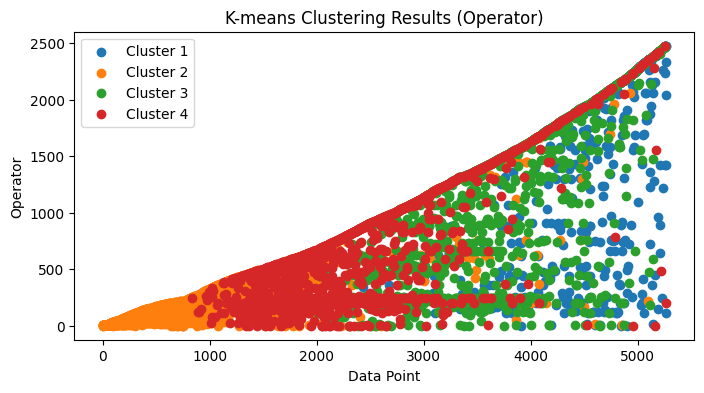

In [1363]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Operator' and 'Operator' as columns in your DataFrame

# Extract the columns to be clustered
# Operator
Operator_data = projected_data[:, Operator_column_index]

K = 4

# Maximum number of iterations
max_iterations = 100

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(Operator_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(Operator_data))

#  Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(Operator_data[:, np.newaxis] - centroids)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    for k in range(K):
        cluster_data = Operator_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Add cluster assignments to the original DataFrame
data['Cluster_Operator'] = cluster_assignments

# Create a smaller figure
plt.figure(figsize=(8, 4))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = data[data['Cluster_Operator'] == k]
    plt.scatter(cluster_data.index, cluster_data['Operator'], label=f'Cluster {k + 1}')

plt.xlabel('Data Point')
plt.ylabel('Operator')
plt.title('K-means Clustering Results (Operator)')
plt.legend()
plt.show()



In [1364]:
silhouette_score = calculate_silhouette_score(Operator_data, cluster_assignments, centroids)

print("Silhouette Score:", silhouette_score)


Silhouette Score: 0.5548462428721286


### 3rd part 

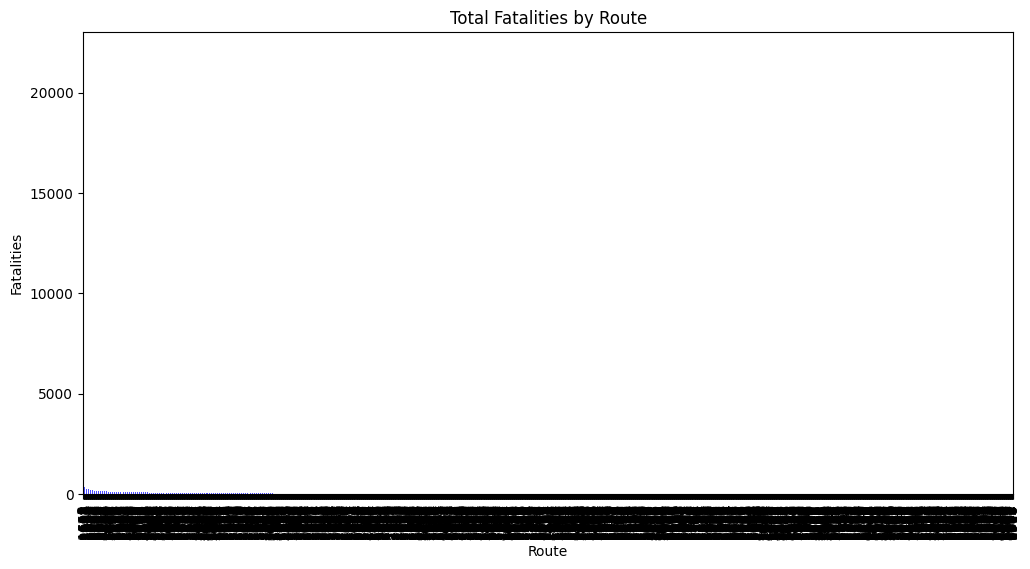

The most dangerous route is '3' with 21917.68302891933 fatalities.


In [1365]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Route' and 'Fatalities' as columns in your DataFrame

# Extract the 'Route' and 'Fatalities' columns
route_fatalities_data = data[['Route', 'Fatalities']]

# Group the data by 'Route' and calculate the total fatalities for each route
route_fatalities_total = route_fatalities_data.groupby('Route')['Fatalities'].sum()

# Sort the routes by total fatalities in descending order
route_fatalities_total = route_fatalities_total.sort_values(ascending=False)

# Create a bar chart to visualize the routes and their fatalities
plt.figure(figsize=(12, 6))
route_fatalities_total.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('Total Fatalities by Route')
plt.xticks(rotation=90)
plt.show()

# Print the route with the most fatalities
most_dangerous_route = route_fatalities_total.idxmax()
most_fatalities = route_fatalities_total.max()
print(f"The most dangerous route is '{most_dangerous_route}' with {most_fatalities} fatalities.")


In [1366]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # Load your data into a DataFrame (replace 'data' with your dataset)
# # Make sure to have 'Location' and 'Operator' as columns in your DataFrame

# # Extract the 'Route' and 'Crashes' columns
# route_crashes_data = data[['Route', 'Fatalities']]

# # Determine the number of clusters (K)
# K = 5  # You can adjust this based on your dataset and requirements

# # Maximum number of iterations
# max_iterations = 100

# # Initialize centroids randomly
# np.random.seed(0)
# sample_indices = np.random.choice(len(route_crashes_data), size=K, replace=False)
# centroids = route_crashes_data.iloc[sample_indices]

# # Initialize an array to store cluster assignments for each data point
# cluster_assignments = np.zeros(len(route_crashes_data))

# # Iterate until convergence or max iterations
# for iteration in range(max_iterations):
#     # Calculate distances to centroids
#     distances = np.abs(route_crashes_data.values - centroids.values)
    
#     # Assign each data point to the nearest centroid
#     cluster_assignments = np.argmin(distances, axis=1)

# # Add cluster assignments to the original DataFrame
# data['Cluster_Route_Crashes'] = cluster_assignments

# # Calculate the total crashes for each cluster
# cluster_crashes = data.groupby('Cluster_Route_Crashes')['Fatalities'].sum()

# # Find the cluster with the most crashes (most dangerous cluster)
# most_dangerous_cluster = cluster_crashes.idxmax()

# # Identify the route(s) in the most dangerous cluster
# most_dangerous_routes = route_crashes_data[data['Cluster_Route_Crashes'] == most_dangerous_cluster]['Route']

# # Print the most dangerous route(s) and total crashes
# print("Most Dangerous Route(s):")
# print(most_dangerous_routes)
# print("Total Crashes in the Most Dangerous Cluster:")
# print(cluster_crashes[most_dangerous_cluster])


# # Create a smaller figure
# plt.figure(figsize=(10, 6))

# # Plot the results for the sampled data
# for k in range(K):
#     cluster_data = route_crashes_data[data['Cluster_Route_Crashes'] == k]
#     plt.scatter(cluster_data.index, cluster_data['Cluster_Route_Crashes'], label=f'Cluster {k + 1}')

# plt.xlabel('Data Point')
# plt.ylabel('Cluster Route-Crashes')
# plt.title('K-means Clustering Results (Route-Crashes)')
# plt.legend()
# plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your data into a DataFrame (replace 'data' with your dataset)
# Make sure to have 'Location' and 'Operator' as columns in your DataFrame

# Extract the 'Route' and 'Fatalities' columns
route_fatalities_data = data[['Route', 'Fatalities']]

# Determine the number of clusters (K)
K = 5  # You can adjust this based on your dataset and requirements

# Maximum number of iterations
max_iterations = 100

# Initialize centroids randomly
np.random.seed(0)
sample_indices = np.random.choice(len(route_fatalities_data), size=K, replace=False)
centroids = route_fatalities_data.iloc[sample_indices]

# Initialize an array to store cluster assignments for each data point
cluster_assignments = np.zeros(len(route_fatalities_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.linalg.norm(route_fatalities_data.values[:, np.newaxis] - centroids.values, axis=2)

    # Assign each data point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

# Add cluster assignments to the original DataFrame
data['Cluster_Route_Fatalities'] = cluster_assignments

# Calculate the total fatalities for each cluster
cluster_fatalities = data.groupby('Cluster_Route_Fatalities')['Fatalities'].sum()

# Find the cluster with the most fatalities (most dangerous cluster)
most_dangerous_cluster = cluster_fatalities.idxmax()

# Identify the route(s) in the most dangerous cluster
most_dangerous_routes = route_fatalities_data[data['Cluster_Route_Fatalities'] == most_dangerous_cluster]['Route']

# Print the most dangerous route(s) and total fatalities
print("Most Dangerous Route(s):")
print(most_dangerous_routes)
print("Total Fatalities in the Most Dangerous Cluster:")
print(cluster_fatalities[most_dangerous_cluster])

# Create a smaller figure
plt.figure(figsize=(10, 6))

# Plot the results for the sampled data
for k in range(K):
    cluster_data = route_fatalities_data[data['Cluster_Route_Fatalities'] == k]
    plt.scatter(cluster_data['Route'], cluster_data['Fatalities'], label=f'Cluster {k + 1}')

plt.xlabel('Route')
plt.ylabel('Fatalities')
plt.title('K-means Clustering Results (Route-Fatalities)')
plt.legend()
plt.show()


ValueError: operands could not be broadcast together with shapes (5268,2) (5,2) 

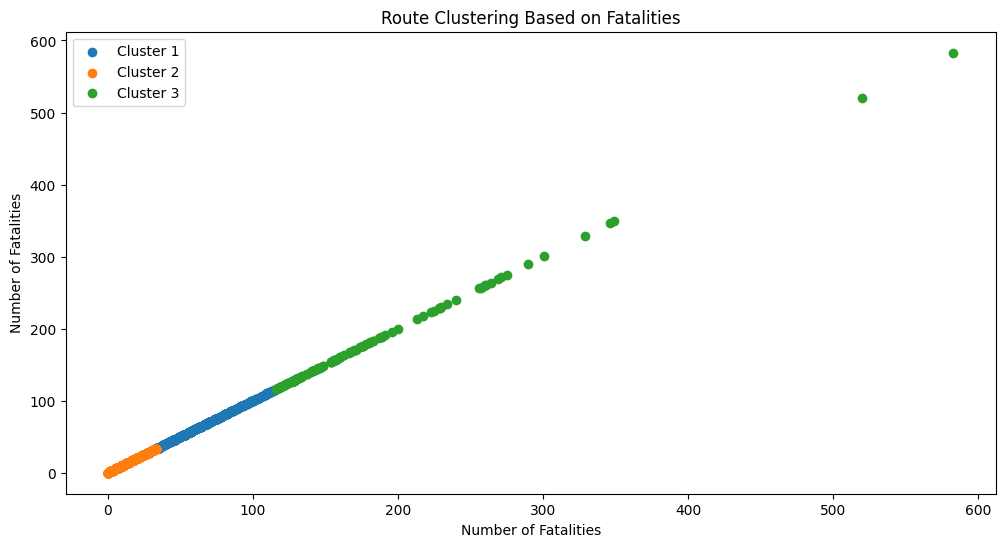

Most Dangerous Routes:
0          1
1          2
2          3
3          3
4          3
        ... 
5261    3238
5262    3239
5264    3241
5266    3243
5267    3244
Name: Route, Length: 4429, dtype: int64
Total Fatalities in Most Dangerous Cluster: 42234.81963470319


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset (replace 'data' with your dataset)
# Make sure to have 'Route' and 'Fatalities' as columns in your DataFrame

# Extract the "Route" and "Fatalities" columns
# data = pd.read_csv('your_dataset.csv')  # Load your dataset
route_fatalities_data = data[['Route', 'Fatalities']]

# Apply the clustering algorithm to cluster routes based on fatalities
K = 3  # Number of clusters (adjust as needed)
max_iterations = 100

# Extract the "Fatalities" column for clustering
fatalities_data = route_fatalities_data['Fatalities'].values

# Initialize centroids randomly
np.random.seed(0)
centroids = np.random.choice(fatalities_data, size=K, replace=False)

# Initialize an array to store cluster assignments for each route
cluster_assignments = np.zeros(len(fatalities_data))

# Iterate until convergence or max iterations
for iteration in range(max_iterations):
    # Calculate distances to centroids
    distances = np.abs(fatalities_data[:, np.newaxis] - centroids)

    # Assign each route to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    # Update centroids as the mean of data points in each cluster
    old_centroids = centroids.copy()
    for k in range(K):
        cluster_data = fatalities_data[cluster_assignments == k]
        if len(cluster_data) > 0:
            centroids[k] = np.mean(cluster_data)

# Find the cluster with the highest fatalities
most_dangerous_cluster = np.argmax([np.sum(fatalities_data[cluster_assignments == k]) for k in range(K)])

# Identify the routes in the most dangerous cluster
most_dangerous_routes = route_fatalities_data[cluster_assignments == most_dangerous_cluster]['Route']

# Plot the results (you can choose how to visualize the data)
plt.figure(figsize=(12, 6))
for k in range(K):
    cluster_data = fatalities_data[cluster_assignments == k]
    plt.scatter(cluster_data, cluster_data, label=f'Cluster {k + 1}')

plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Fatalities')
plt.title('Route Clustering Based on Fatalities')
plt.legend()
plt.show()

# Print the most dangerous routes and the total number of fatalities in the most dangerous cluster
print("Most Dangerous Routes:")
print(most_dangerous_routes)
print("Total Fatalities in Most Dangerous Cluster:", np.sum(fatalities_data[cluster_assignments == most_dangerous_cluster]))

# You can also write your observations based on the clustering results.
